In [2]:
from preamble import *
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:100% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:100%; line-height:1.0; overflow: visible;} .output_subarea pre{width:100%}</style>''') # For slides
#HTML('''<style>html, body{overflow-y: visible !important} .output_subarea{font-size:100%; line-height:1.0; overflow: visible;}</style>''') # For slides
InteractiveShell.ast_node_interactivity = "all"

## Agenda

- Introduction and Motivation
- **Artificial Neuron**
- Gradient Descent
- Backpropagation
- Perceptron
- Multilayered Perceptron
- MLP Classification
- Model Design
- Optimization

- Convolutional Neural Network
- Recurrent Neural Network

## Artificial Neuron Model
![Neuron](images/neuron.png)
- The input to the neuron is defined by $x_0$ to $x_4$, noted as input vector $\mathbf{x}$
- Edges between nodes have parameters $\mathbf{w}$ and a bias term $b$
- A single neuron implements:
$$ o(x; \theta) = \phi(\sum_{i} {w_i x_i} + b) = \phi(\mathbf{w}^T \mathbf{x})$$

- If the input to the model is a vector $\mathbf{x}=[1, 2, 3]^\top$
- parameterized by $\mathbf{w}=[1, 0.5, 1]^\top, b = 0.5$

- Computes the following expression:
- $o = \phi(\mathbf{w}^\top\mathbf{x})=\phi(1*1 + 2 * 0.5 + 3 * 1 + 0.5)=\phi(1 + 1 + 3 + 0.5) = \phi(5.5)$
- $\phi$ can be many different functions. 
- E.g. $\phi(x) = x$
    - In which case: $o = \phi(5.5) = 5.5$
![Neuron Activated](images/neuron-activated.png)

- Activation function $\phi(x) = x$
    - Can be used as a linear regression model

## Linear Regression

![Linear Regression data](images/lin-reg.png)

## Linear Regression

### Empirical Risk minimization
$\DeclareMathOperator*{\argmin}{arg\,min}$
$$\argmin_{\theta}\frac{1}{N}\sum^{N}_{i=0}{L\left(f(\mathbf{x}^{(i)};\theta), y^{(i)}\right)}$$

## Linear Regression 

### Empirical Risk minimization
$\DeclareMathOperator*{\argmin}{arg\,min}$
$$\argmin_{\theta}\frac{1}{N}\sum^{N}_{i=0}{L\left(f(\mathbf{x}^{(i)};\theta), y^{(i)}\right)}$$


$$\argmin_{\theta}\frac{1}{N}\sum^{N}_{i=0}{L\left(o_\theta(\mathbf{x}^{(i)}), y^{(i)}\right)}$$


## Agenda

- Introduction and Motivation
- Artificial Neuron
- **Gradient Descent**
- Backpropagation
- Perceptron
- Multilayered Perceptron
- MLP Classification
- Model Design
- Optimization

- Convolutional Neural Network
- Recurrent Neural Network

## Linear Regression 

### Empirical Risk minimization
$\DeclareMathOperator*{\argmin}{arg\,min}$
$$\argmin_{\theta}\frac{1}{N}\sum^{N}_{i=0}{L\left(f(\mathbf{x}^{(i)};\theta), y^{(i)}\right)}$$


$$\argmin_{\theta}\frac{1}{N}\sum^{N}_{i=0}{L\left(o_\theta(\mathbf{x}^{(i)}), y^{(i)}\right)}$$


## Gradient Descent Optimization

- Given a set of $n$ examples $\{(\mathbf{x}, y)\}$.

- GD Update rule:
* repeat until convergence {
    $$\theta \gets \theta - \alpha \nabla_\theta L(\mathbf{x}; \theta)$$
}


## Gradient Descent Optimization

- Given a set of $n$ examples $\{(\mathbf{x}, y)\}$.

- GD Update rule:
* repeat until convergence {
$$w \gets w - \alpha \frac{\partial}{\partial w}{L(\mathbf{x}, y; \mathbf{w}, b)}$$ 
$$b \gets b - \alpha \frac{\partial}{\partial b}{L(\mathbf{x}, y; \mathbf{w}, b)}$$ 
}
- $\alpha$ - learning rate



### Requirements:
- Model: 
    - $o_\mathbf{\theta} = {\mathbf{w}^\top x}$
    - $\theta : \{\mathbf{w}, b\}$
- Loss function: 
    - $L(\mathbf{x}, y; \mathbf{w}, b) = \frac{1}{2n}\sum_{i=0}^{n}{(o_\theta - y)^2}$ 
    
- Gradient of $L$ wrt $\mathbf{w}$ and $b$:
    
    - $\frac{\partial}{\partial w}{L(.)}$ 
    - $\frac{\partial}{\partial b}{L(.)}$

## Computing the gradient of the loss

### Compute graph 
- For a single data-point $\{x=2, y=2\}$
![Compute graph init](images/comp-graph-init.png)

## Computing the gradient of the loss

### Compute graph (forward pass)
- $o=wx+b=2*2+1=5$
- $L=\frac{1}{2}(o - y)^2=\frac{1}{2}(5 - 2)^2= 0.5*3^2=4.5$

![Compute graph forward](images/comp-graph-forward.png)

## Computing the gradient of the loss

### Compute graph (backward pass)
- $\frac{\partial{L}}{\partial{L}}=1$
- $\frac{\partial{L}}{\partial{o}}=\frac{2(o-y)}{2}*1=(o-y)$
- $\frac{\partial{L}}{\partial{q}}=\frac{\partial{o}}{\partial{q}}\frac{\partial{L}}{\partial{o}}=1*(o-y)$
- $\frac{\partial{L}}{\partial{r}}=\frac{\partial{o}}{\partial{r}}\frac{\partial{L}}{\partial{o}}=1*(o-y)$
- $\frac{\partial{L}}{\partial{w}}=\frac{\partial{q}}{\partial{w}}\frac{\partial{o}}{\partial{q}}=x*(o-y)$
- $\frac{\partial{L}}{\partial{b}}=\frac{\partial{r}}{\partial{b}}\frac{\partial{o}}{\partial{r}}=1*(o-y)$


![Compute graph init](images/comp-graph-backward.png)

## Backpropagation

- Compute forward pass
    - $o = x (*) w$ 
- For each node compute the local derivative
    - $\frac{\partial o}{\partial x}$
    - $\frac{\partial o}{\partial w}$
- Backward pass the derivative
    - apply the chain rule

![Compute graph init](images/backprop-node.png)

## Computing the gradient of the loss

### Compute graph (backward pass)

![Compute graph init](images/comp-graph-backward.png)


$$w \gets w - \alpha \frac{\partial}{\partial w}{L(\mathbf{x}, y; \mathbf{w}, b)}$$ 

$$w \gets 2 - 0.1 * 6$$ 

$$b \gets b - \alpha \frac{\partial}{\partial b}{L(\mathbf{x}, y; \mathbf{w}, b)}$$ 

$$b \gets 1 - 0.1 * 3$$ 


## Implementation: Tensorflow

- Provides symbolic differentiation capability
- Needed for training much more complex models

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random


In [4]:
# Parameters
learning_rate = 0.001
training_epochs = 500
display_step = 50
n_samples = 100

In [5]:
# Training data

alpha = -2.0
beta = 1.5
train_X = np.asarray(np.random.uniform(0, 5, n_samples))
train_Y = np.asarray(np.add(np.add(np.multiply(train_X, alpha), beta), np.random.normal(0, 1.5, n_samples)))

In [6]:
# Input Nodes
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Model parameters
W = tf.Variable(0.1, name="weight") #initialize to random values
b = tf.Variable(0.1, name="bias") #initialize to random values

In [7]:
# Model definition
Y_hat = tf.add(tf.mul(X, W), b)

In [8]:

# Loss function
    # Mean squared error
cost = tf.reduce_sum(tf.pow(Y_hat-Y, 2))/(2*n_samples)

# Optimizer
    # Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
# Initializing the variables
init = tf.global_variables_initializer()

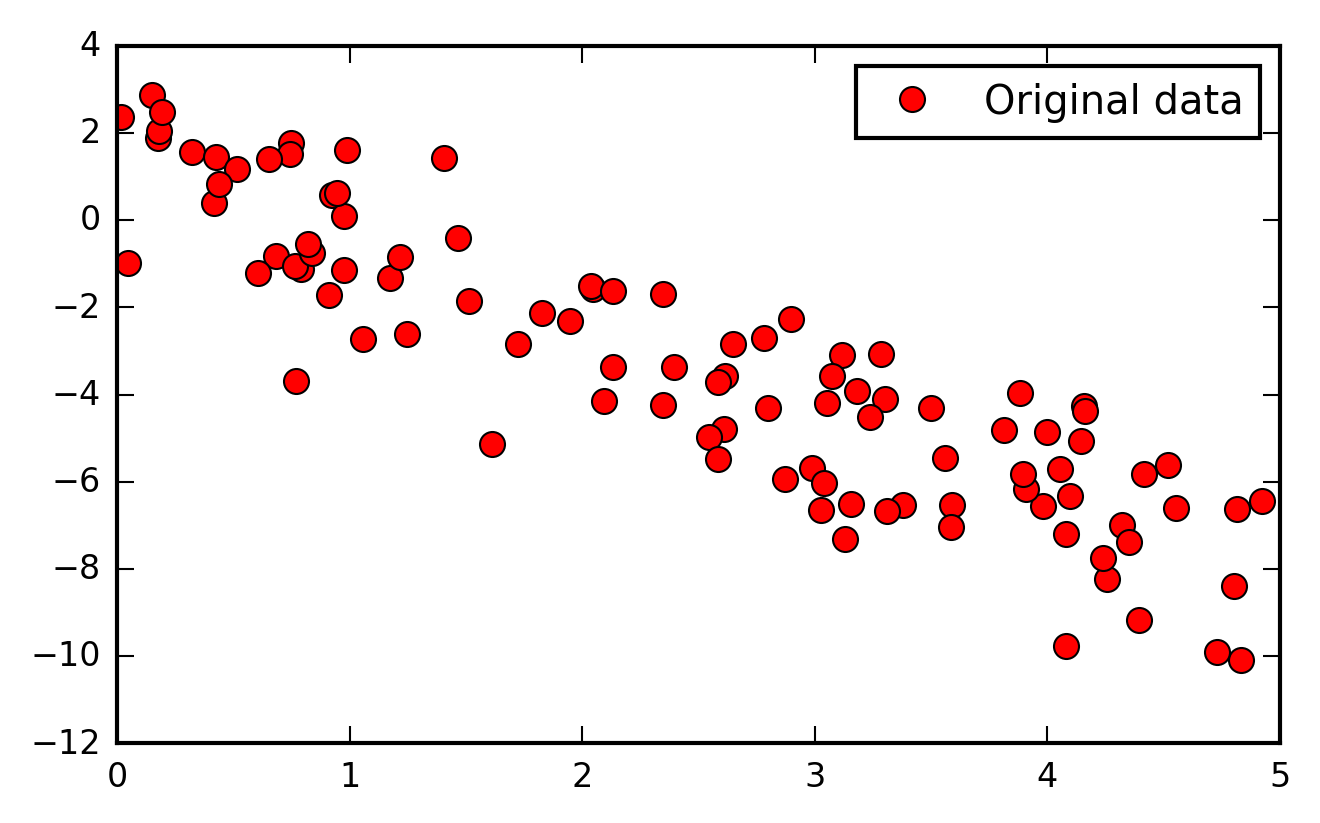

In [10]:
# Plot
plt.plot(train_X, train_Y, 'ro', label='Original data')
#plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

Epoch: 0050 cost= 5.917184353 W= -0.448387 b= -0.0472214
Epoch: 0100 cost= 3.235764265 W= -0.801074 b= -0.134043
Epoch: 0150 cost= 2.135676622 W= -1.02868 b= -0.182352
Epoch: 0200 cost= 1.681416988 W= -1.17632 b= -0.206134
Epoch: 0250 cost= 1.490961790 W= -1.27284 b= -0.214326
Epoch: 0300 cost= 1.408329606 W= -1.33667 b= -0.212636
Epoch: 0350 cost= 1.369830370 W= -1.37958 b= -0.204713
Epoch: 0400 cost= 1.349457979 W= -1.40909 b= -0.192888
Epoch: 0450 cost= 1.336586714 W= -1.43001 b= -0.178648
Epoch: 0500 cost= 1.326880455 W= -1.44544 b= -0.162943
Optimization Finished!
Training cost= 1.32688 W= -1.44544 b= -0.162943 



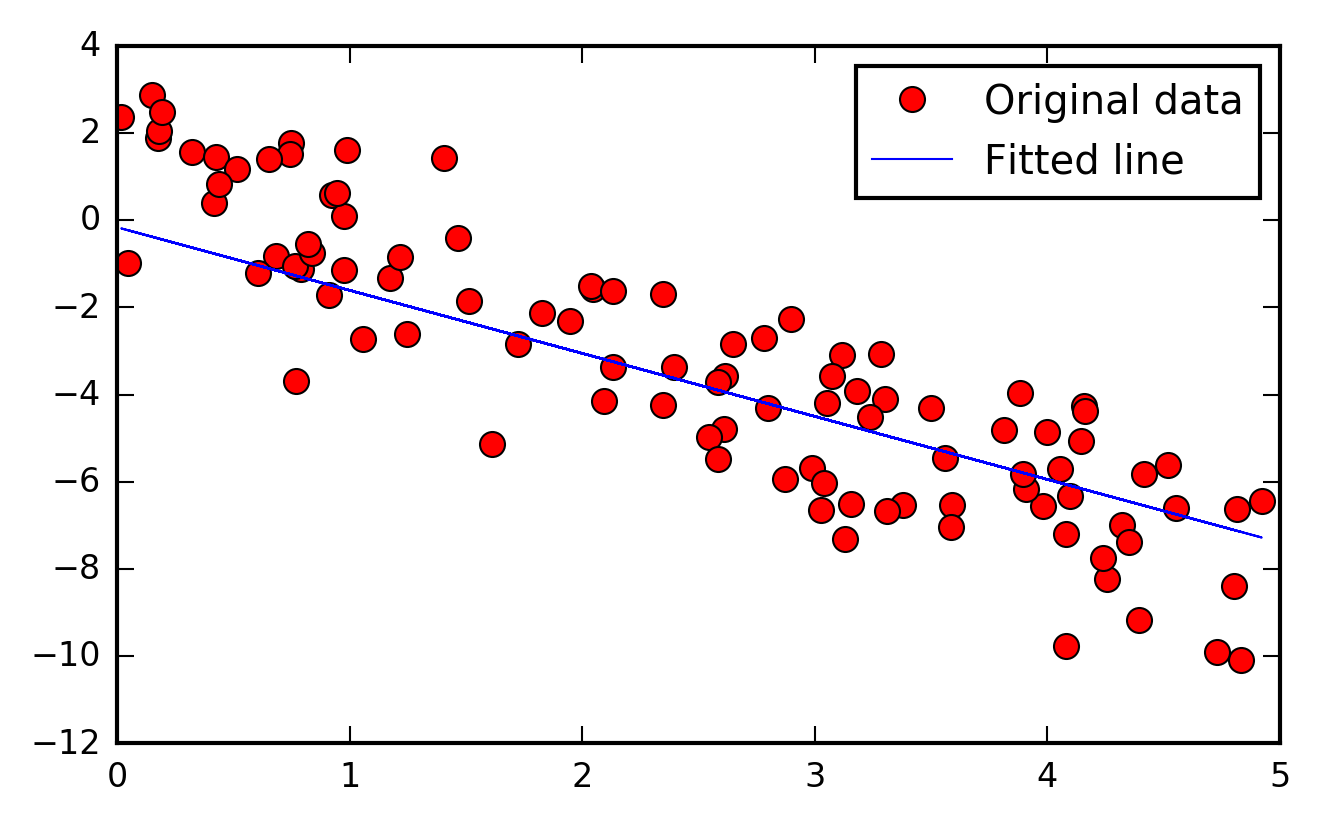

In [11]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()